In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import joblib


In [3]:
data=pd.read_excel('data/dataBiomass_CE880.xlsx',skiprows=2,header=0).drop('Number',axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cellulose                    336 non-null    float64
 1   Hemicellulose                336 non-null    float64
 2   Lignin                       336 non-null    float64
 3   Temp                         336 non-null    float64
 4   Pressure                     336 non-null    float64
 5   Equivalance mass ratio       336 non-null    float64
 6   Steam to biomass mass ratio  336 non-null    float64
 7   Superficial gas velocity     336 non-null    float64
 8   H2                           336 non-null    float64
 9   CO                           336 non-null    float64
 10  CO2                          336 non-null    float64
 11  CH4                          336 non-null    float64
 12  Lower heating value          336 non-null    float64
 13  Char yield          

In [12]:
data.head()

,Cellulose,Hemicellulose,Lignin,Temp,Pressure,Equivalance mass ratio,Steam to biomass mass ratio,Superficial gas velocity,H2,CO,CO2,CH4,Lower heating value,Char yield,tar yield
0,0.460025,0.28884,0.251135,665.0,1.0,0.25,0.0,0.22,9.696970,48.242424,35.030303,7.030303,9.646865,24.0,0.0
1,0.460025,0.28884,0.251135,744.0,1.0,0.30,0.0,0.22,10.125904,40.048219,43.477096,6.348781,8.416246,21.7,0.0
2,0.460025,0.28884,0.251135,811.0,1.0,0.35,0.0,0.22,9.614294,36.159955,48.610323,5.615428,7.608063,19.0,0.0
3,0.460025,0.28884,0.251135,670.0,1.0,0.25,0.0,0.28,9.686536,46.993834,37.255910,6.063720,9.141723,29.6,0.0
4,0.460025,0.28884,0.251135,750.0,1.0,0.30,0.0,0.28,9.368972,39.763020,45.356848,5.511160,7.998170,27.4,0.0


In [11]:
data.describe()

,Cellulose,Hemicellulose,Lignin,Temp,Pressure,Equivalance mass ratio,Steam to biomass mass ratio,Superficial gas velocity,H2,CO,CO2,CH4,Lower heating value,Char yield,tar yield
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.452065,0.280841,0.267094,752.547515,1.246518,0.181179,0.578095,0.747241,25.997105,31.618541,31.782387,10.581432,6.813697,11.288135,16.546825
std,0.081601,0.088872,0.086694,85.306413,0.949579,0.166832,1.134802,1.221697,10.132968,6.825742,8.802861,3.978783,2.820948,10.626665,22.510391
min,0.196078,0.078707,0.102000,600.000000,1.000000,0.000000,0.000000,0.021893,5.388034,5.012658,6.780000,1.310700,1.744396,0.000000,0.000000
25%,0.435622,0.249327,0.203039,657.500000,1.000000,0.000000,0.000000,0.189035,20.645197,27.625389,25.136941,7.798019,4.863707,3.200000,0.011750
50%,0.452000,0.289855,0.251135,780.000000,1.000000,0.230000,0.330000,0.555000,26.404713,32.577731,30.473296,9.532769,6.556189,6.880718,6.640000
75%,0.502865,0.327000,0.298283,815.000000,1.000000,0.300000,0.700000,0.714364,31.066629,35.928018,36.838649,13.703169,8.322500,17.900000,25.100000
max,0.584000,0.627451,0.489926,900.000000,10.000000,0.864198,8.028674,9.589655,66.033993,55.440000,62.560216,20.120987,14.956647,45.000000,134.100000


array([[<Axes: title={'center': 'Cellulose'}>,
        <Axes: title={'center': 'Hemicellulose'}>,
        <Axes: title={'center': 'Lignin'}>,
        <Axes: title={'center': 'Temp'}>],
       [<Axes: title={'center': 'Pressure'}>,
        <Axes: title={'center': 'Equivalance mass ratio'}>,
        <Axes: title={'center': 'Steam to biomass mass ratio'}>,
        <Axes: title={'center': 'Superficial gas velocity'}>],
       [<Axes: title={'center': 'H2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'CO2'}>, <Axes: title={'center': 'CH4'}>],
       [<Axes: title={'center': 'Lower heating value'}>,
        <Axes: title={'center': 'Char yield'}>,
        <Axes: title={'center': 'tar yield'}>, <Axes: >]], dtype=object)

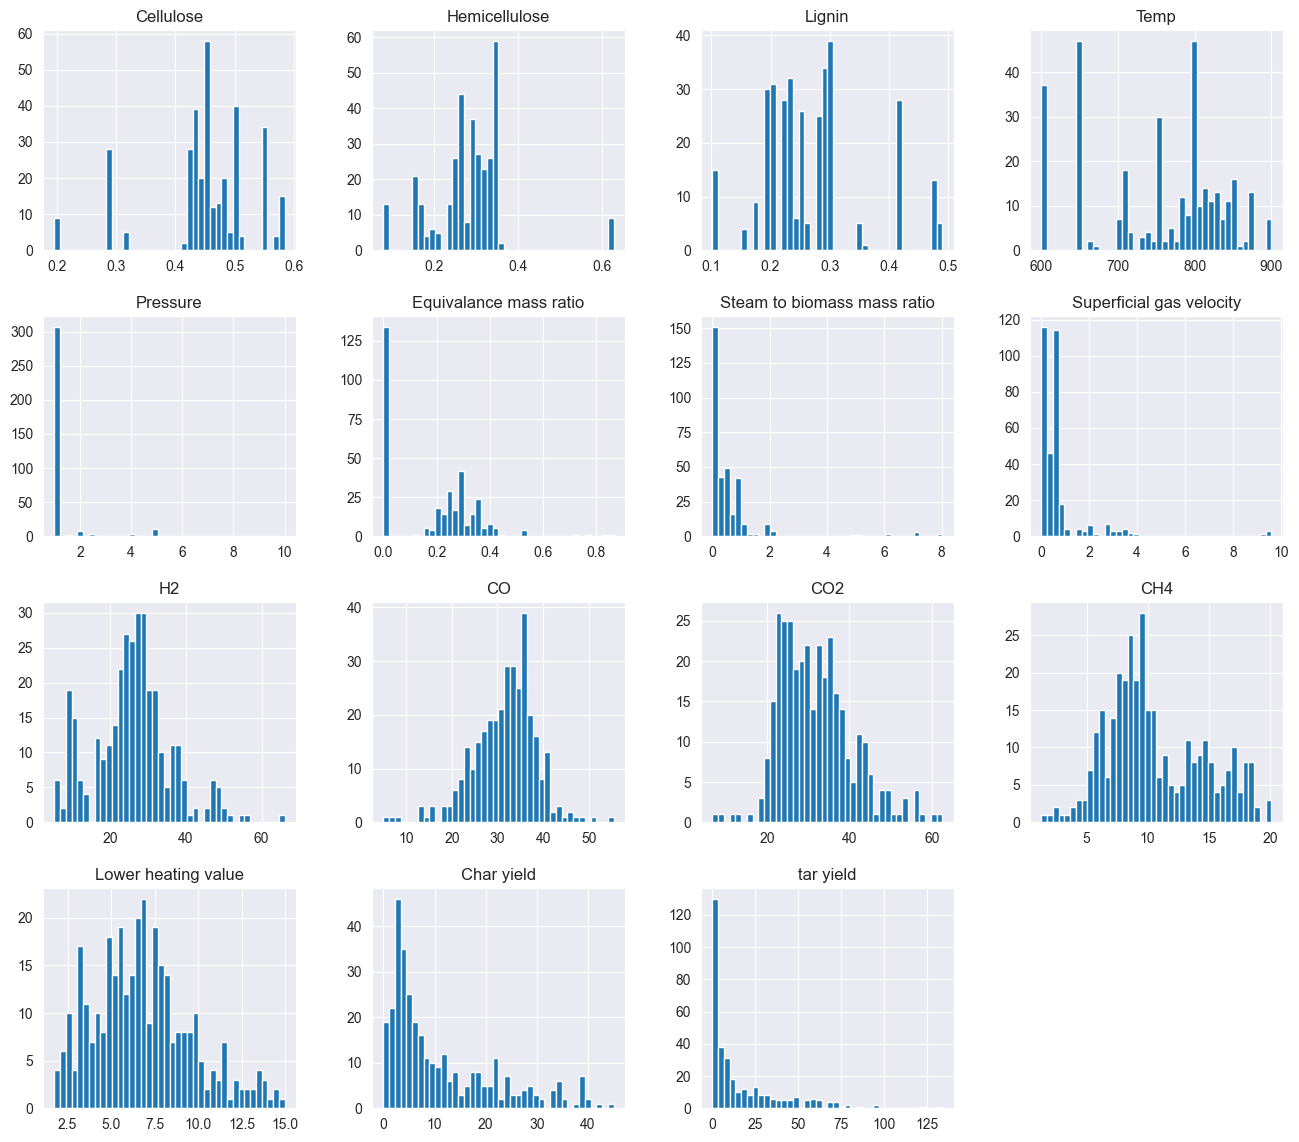

In [14]:
data.hist(bins=40,figsize=(16,14))

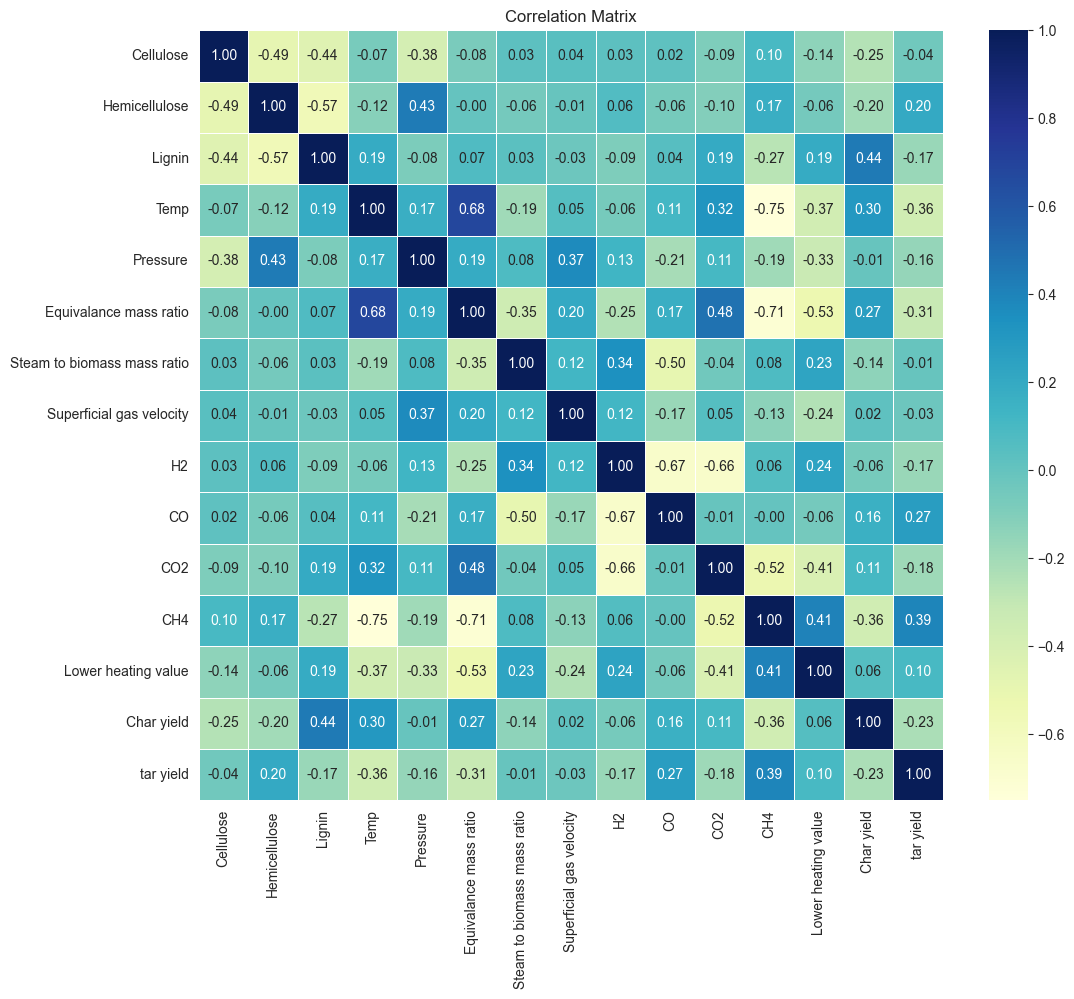

In [15]:
corr_matrix=data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr_matrix,cmap='YlGnBu',annot=True,linewidths=0.5,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

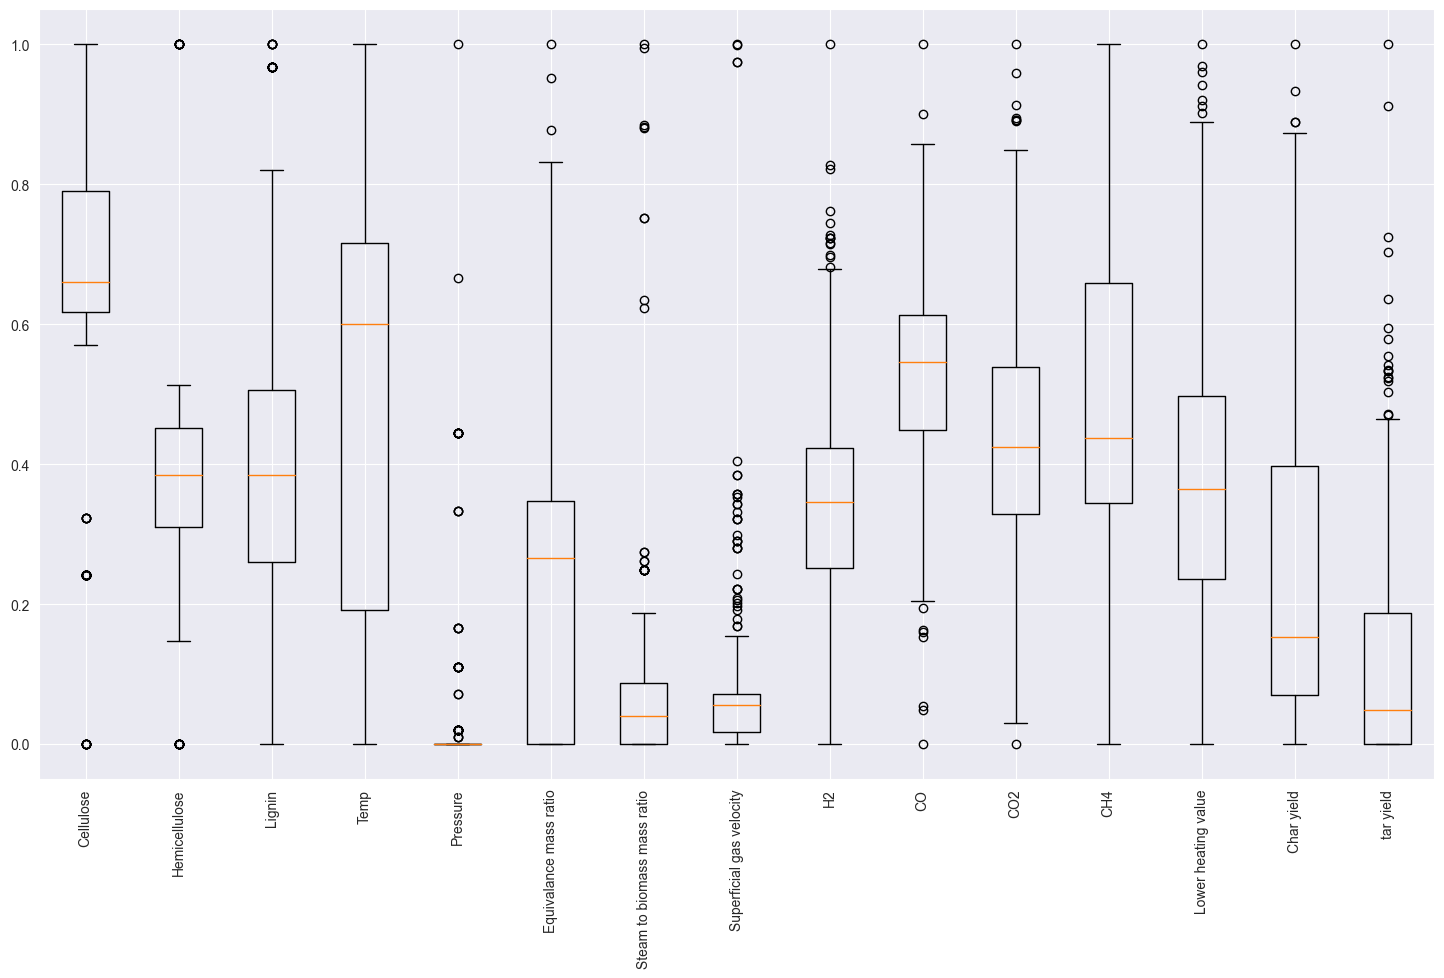

In [16]:

data=pd.read_excel('data/dataBiomass_CE880.xlsx',skiprows=2,header=0).drop('Number',axis=1)
mms=MinMaxScaler()
norm_data=mms.fit_transform(data)

plt.figure(figsize=(18,10))
plt.boxplot(norm_data)
labels=data.columns
plt.xticks(range(1,len(labels)+1),labels,rotation='vertical')
plt.show()

In [17]:
data.columns

Index(['Cellulose', 'Hemicellulose', 'Lignin', 'Temp', 'Pressure',
       'Equivalance mass ratio', 'Steam to biomass mass ratio',
       'Superficial gas velocity', 'H2', 'CO', 'CO2', 'CH4',
       'Lower heating value', 'Char yield', 'tar yield'],
      dtype='object')